### Setup

In [1]:
from matplotlib.pyplot import rc
rc('figure', facecolor='white')

In [2]:
import qiskit as qk
import discopy as dp

## 1. Drawing cooking recipes

**Exercise:** Draw your favorite cooking recipe as a diagram.

**Pasta Aglio e Olio:**

1. Bring a pot of water to a boil. Add pasta, cook until al dente, and then strain the pasta.

2. Heat olive oil over medium heat in a saute pan.
Add sliced garlic and cook until it begins to turn golden brown.

3. Add the pasta to the saute pan and toss until well coated.

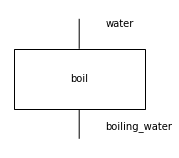

In [3]:
water, boiling_water = dp.Ty('water'), dp.Ty('boiling_water')

boil = dp.Box('boil', dom=water, cod=boiling_water)
boil.draw(figsize=(2, 2))

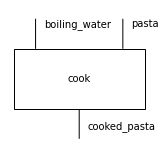

In [4]:
pasta, cooked_pasta = dp.Ty('pasta'), dp.Ty('cooked_pasta')

cook = dp.Box('cook', dom=boiling_water @ pasta, cod=cooked_pasta)
cook.draw(figsize=(2, 2))

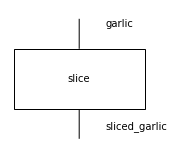

In [5]:
garlic, sliced_garlic = dp.Ty('garlic'), dp.Ty('sliced_garlic')

slice = dp.Box('slice', dom=garlic, cod=sliced_garlic)
slice.draw(figsize=(2, 2))

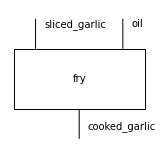

In [6]:
oil, cooked_garlic = dp.Ty('oil'), dp.Ty('cooked_garlic')

fry = dp.Box('fry', dom=sliced_garlic @ oil, cod=cooked_garlic)
fry.draw(figsize=(2, 2))

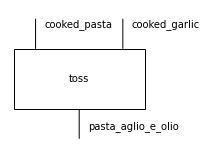

In [7]:
pasta_aglio_e_olio = dp.Ty('pasta_aglio_e_olio')

toss = dp.Box('toss', dom=cooked_pasta @ cooked_garlic, cod=pasta_aglio_e_olio)
toss.draw(figsize=(2, 2))

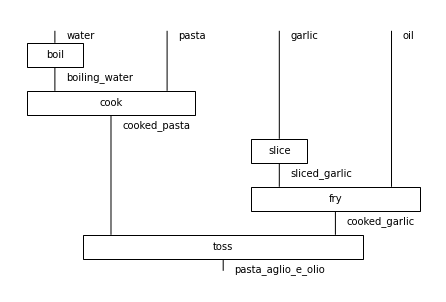

In [8]:
recipe = boil @ dp.Id(pasta @ garlic @ oil) \
         >> cook @ slice @ dp.Id(oil) \
         >> dp.Id(cooked_pasta) @ fry \
         >> toss
recipe.draw()

**Exercise:** Define a function that takes a number $n$ and returns the recipe of a tiramisu with $n$ layers of crema di mascarpone and savoiardi.

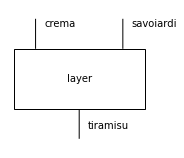

In [9]:
crema, savoiardi, tiramisu = dp.Ty('crema'), dp.Ty('savoiardi'), dp.Ty('tiramisu')

layer = dp.Box('layer', dom=crema @ savoiardi, cod=tiramisu)
layer.draw(figsize=(2, 2))

In [10]:
def tiramisu_n(n):
    """
    A function that returns the recipe of a tiramisu with n layers of crema di mascarpone and savoiardi.
    """
    crema, savoiardi, tiramisu = dp.Ty('crema'), dp.Ty('savoiardi'), dp.Ty('tiramisu')
    domain = crema @ savoiardi
    for _ in range(n-1):
        domain = domain @ (crema @ savoiardi)
    return dp.Box('layer', dom=domain, cod=tiramisu)

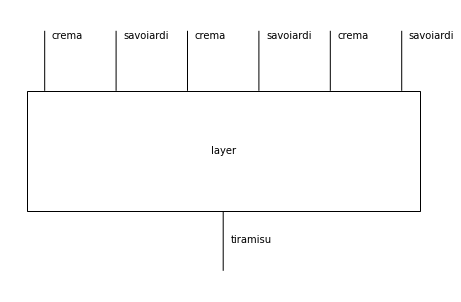

In [11]:
tiramisu_n(3).draw()

**Exercise (harder):** Define a function that takes a number $n$ and returns the recipe for cracking $n$ eggs.

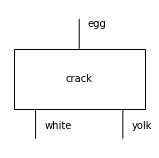

In [12]:
egg, white, yolk = dp.Ty('egg'), dp.Ty('white'), dp.Ty('yolk')

crack = dp.Box('crack', dom=egg, cod=white @ yolk)
crack.draw(figsize=(2, 2))

In [13]:
def crack_n(n):
    """
    A function that returns the recipe for cracking n eggs.
    """
    egg, white, yolk = dp.Ty('egg'), dp.Ty('white'), dp.Ty('yolk')
    crack = dp.Box('crack', dom=egg, cod=white @ yolk)
    recipe = crack
    for _ in range(n-1):
        recipe = recipe @ crack
    return recipe

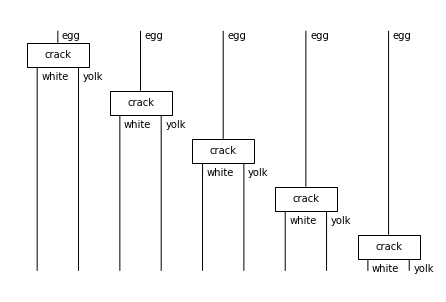

In [14]:
crack_n(5).draw()

**Exercise:** Define a functor that translate your <s>favorite language to</s> English to Italian.

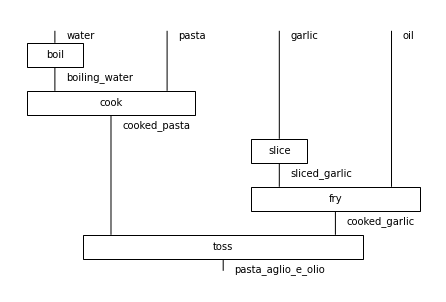

In [15]:
recipe.draw()

In [16]:
acqua, acqua_bollente = dp.Ty('acqua'), dp.Ty('acqua_bollente')
pasta_cotta = dp.Ty('pasta_cotta')
aglio, aglio_affettato = dp.Ty('aglio'), dp.Ty('aglio_affettato')
olio, aglio_cotto = dp.Ty('olio'), dp.Ty('aglio_cotto')

bollire = dp.Box('bollire', dom=acqua, cod=acqua_bollente)
cucinare = dp.Box('cucinare', dom=acqua_bollente @ pasta, cod=pasta_cotta)
affettare = dp.Box('affettare', dom=aglio, cod=aglio_affettato)
friggere = dp.Box('friggere', dom=aglio_affettato @ olio, cod=aglio_cotto)
mescolare = dp.Box('mescolare', dom=pasta_cotta @ aglio_cotto, cod=pasta_aglio_e_olio)

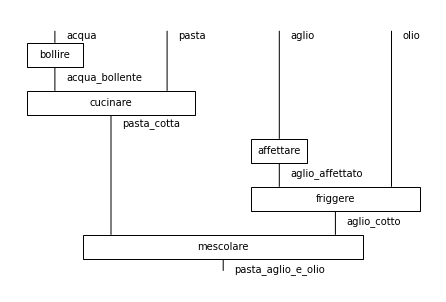

In [17]:
english2italian = dp.Functor(
    ob={water: acqua,
        boiling_water: acqua_bollente,
        pasta: pasta,
        cooked_pasta: pasta_cotta,
        garlic: aglio,
        sliced_garlic: aglio_affettato,
        cooked_garlic: aglio_cotto,
        oil: olio},
    ar={boil: bollire,
        cook: cucinare,
        slice: affettare,
        fry: friggere,
        toss: mescolare}
)

english2italian(recipe).draw()

**Exercise:** Define a `french2english` functor, check that it's the inverse of `english2french` on a small example.

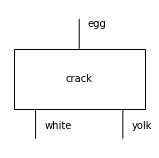

In [18]:
egg, white, yolk = dp.Ty('egg'), dp.Ty('white'), dp.Ty('yolk')

crack = dp.Box('crack', dom=egg, cod=white @ yolk)
crack.draw(figsize=(2, 2))

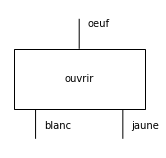

In [19]:
oeuf, blanc, jaune = dp.Ty("oeuf"), dp.Ty("blanc"), dp.Ty("jaune")
ouvrir = dp.Box("ouvrir", oeuf, blanc @ jaune)

english2french = dp.Functor(
    ob={egg: oeuf,
        white: blanc,
        yolk: jaune},
    ar={crack: ouvrir}
)

english2french(crack).draw(figsize=(2, 2))

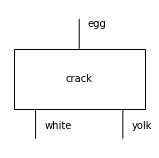

In [20]:
french2english = dp.Functor(
    ob={oeuf: egg,
        blanc: white,
        jaune: yolk},
    ar={ouvrir: crack}
)

french2english(english2french(crack)).draw(figsize=(2, 2))

## 2. Tensors as boxes

**Exercise:** Define a function that takes a number $n$ and returns the diagram for an MPS with $n$ particles and random entries. Check how the evaluation time scales with the size of the diagram.

**Exercise:** Install the [tensornetwork](https://pypi.org/project/tensornetwork/) library and use it to contract the MPS diagrams more efficiently. This is done with the syntax `diagram.eval(contractor=tn.contractor.auto)`.

## 3. Drawing quantum circuits

**Exercise:** Run your own Bell experiment on quantum hardware.

In [21]:
qk.IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

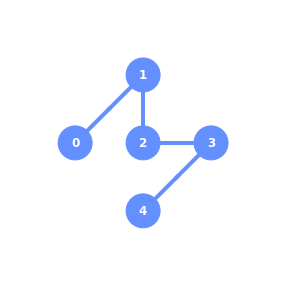

In [22]:
provider = qk.IBMQ.get_provider(hub="ibm-q-startup", group="opacity-quantum", project="testing")
backend = provider.get_backend('ibmq_bogota')

qk.visualization.plot_gate_map(backend);

In [23]:
bell_qk = qk.QuantumCircuit(2)
bell_qk.h(0)
bell_qk.cnot(0, 1)
bell_qk.measure_all()

bell_qk.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [24]:
job = qk.execute(bell_qk, backend, shots=8000)

print('Job ID: ' + job.job_id())
qk.tools.monitor.job_monitor(job)

counts = job.result().get_counts()

Job ID: 610a25ee8e24428ffcb0afef
Job Status: job has successfully run


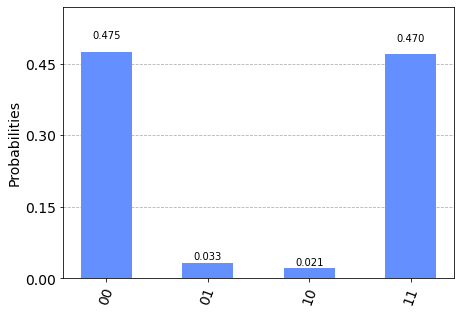

In [25]:
qk.visualization.plot_histogram(counts);

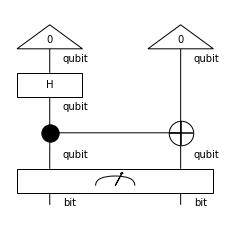

In [26]:
bell_dp = dp.quantum.Ket(0, 0) \
       >> dp.quantum.H @ dp.Id(dp.quantum.qubit) \
       >> dp.quantum.CX \
       >> dp.quantum.Measure(n_qubits=2)
bell_dp.draw(figsize=(3, 3))

In [27]:
bell_dp.eval()

CQMap(dom=CQ(), cod=C(Dim(2, 2)), array=[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j])

In [28]:
from pytket.extensions.qiskit import AerBackend

bell_dp.eval(backend=AerBackend())

Tensor(dom=Dim(1), cod=Dim(2, 2), array=[0.49414062, 0.    , 0.    , 0.50585938])

**Exercise:** Draw a circuit that evaluates to the GHZ state $\frac{1}{\sqrt{2}} (|000\rangle + |111\rangle)$.

In [29]:
ghz_qk = qk.QuantumCircuit(3)
ghz_qk.h(0)
ghz_qk.cnot(0, 1)
ghz_qk.cnot(0, 2)
ghz_qk.measure_all()

ghz_qk.draw()

┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────■───░─┤M├──────
        └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──┼───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

**Exercise:** Define a function that takes a number $n$ and returns a circuit for the state $\frac{1}{\sqrt{2}} (|0...0\rangle + |1...1\rangle)$.

In [30]:
def ghz_n(n):
    """
    A function that takes returns a circuit for the n-qubit state.
    """
    circ = qk.QuantumCircuit(n)
    circ.h(0)
    for j in range(1, n):
        circ.cnot(0, j)
    circ.measure_all()
    return circ

In [31]:
ghz_n(5).draw()

┌───┐                     ░ ┌─┐            
   q_0: ┤ H ├──■────■────■────■───░─┤M├────────────
        └───┘┌─┴─┐  │    │    │   ░ └╥┘┌─┐         
   q_1: ─────┤ X ├──┼────┼────┼───░──╫─┤M├─────────
             └───┘┌─┴─┐  │    │   ░  ║ └╥┘┌─┐      
   q_2: ──────────┤ X ├──┼────┼───░──╫──╫─┤M├──────
                  └───┘┌─┴─┐  │   ░  ║  ║ └╥┘┌─┐   
   q_3: ───────────────┤ X ├──┼───░──╫──╫──╫─┤M├───
                       └───┘┌─┴─┐ ░  ║  ║  ║ └╥┘┌─┐
   q_4: ────────────────────┤ X ├─░──╫──╫──╫──╫─┤M├
                            └───┘ ░  ║  ║  ║  ║ └╥┘
meas: 5/═════════════════════════════╩══╩══╩══╩══╩═
                                     0  1  2  3  4

## 4. Drawing grammatical structure

**Exercise:** Draw the diagram of a sentence in a language with a different word order, e.g. Japanese.

**Exercise:** Draw the diagram of a sentence in a language written right to left, e.g. Arabic.

**Exercise:** Draw your favorite sentence, define the meaning of each word then evaluate it as a tensor.

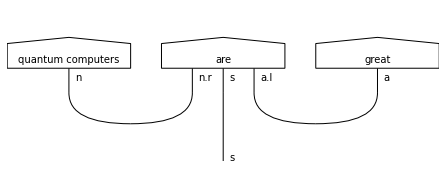

In [32]:
a, n, v, s = dp.Ty('a'), dp.Ty('n'), dp.Ty('v'), dp.Ty('s')

quantum_computers = dp.Word('quantum computers', n)
are = dp.Word('are', n.r @ s @ a.l)
great = dp.Word('great', a)

sentence = quantum_computers @ are @ great \
           >> dp.Cup(n, n.r) @ dp.Id(s) @ dp.Cup(a.l, a)
dp.pregroup.draw(sentence)

In [33]:
F = dp.tensor.Functor(
    ob={n: 2, s: 1, a: 2},
    ar={quantum_computers: [0, 1], are: [0, 0, 1, 0], great: [1, 0]}
)

In [34]:
F(sentence) == 1

True

**Exercise:** Build a toy model with a 4-dimensional noun space, add `Charlie` and `Diane` to the story.

In [35]:
n, s = dp.Ty('n'), dp.Ty('s')

Alice = dp.Word('Alice', n)
loves = dp.Word('loves', n.r @ s @ n.l)
Bob = dp.Word('Bob', n)
Charlie = dp.Word('Charlie', n)
hates = dp.Word('hates', n.r @ s @ n.l)
Diane = dp.Word('Diane', n)

grammar = dp.Cup(n, n.r) @ dp.Id(s) @ dp.Cup(n.l, n)

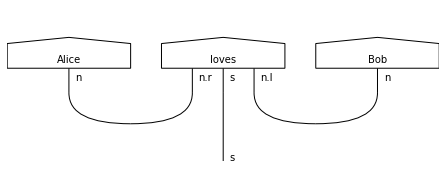

In [36]:
sentence = Alice @ loves @ Bob \
           >> grammar
dp.pregroup.draw(sentence)

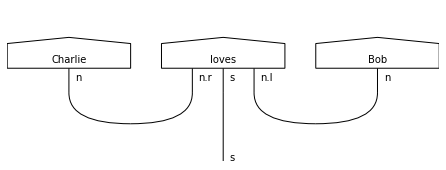

In [37]:
sentence = Charlie @ loves @ Bob \
           >> grammar
dp.pregroup.draw(sentence)

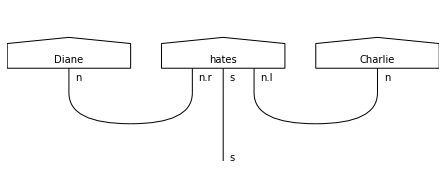

In [38]:
sentence = Diane @ hates @ Charlie \
           >> grammar
dp.pregroup.draw(sentence)


**Exercise:** Define the meaning of the word `Does` and draw the diagram for the yes-no question `Does Alice love Bob?`. The meaning of the question should be the same as the sentence `Alice loves Bob`, i.e. the answer is "yes" if the sentence is true.

In [39]:
n, s = dp.Ty('n'), dp.Ty('s')

Does = dp.Word('Does', s @ s.l @ n @ n.l)
Alice = dp.Word('Alice', n)
love = dp.Word('love', n.r @ s @ n.l)
Bob = dp.Word('Bob', n)

In [40]:
F = dp.tensor.Functor(
    ob={n: 2, s: 1},
    ar={Does: [1, 0, 0, 1],
        Alice: [0, 1],
        love: [0, 1, 1, 0],
        Bob: [1, 0]}
)

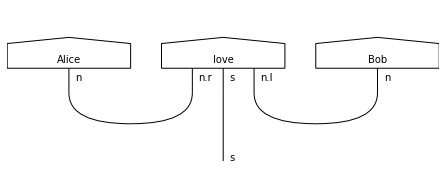

In [41]:
sentence = Alice @ love @ Bob \
    >> dp.Cup(n, n.r) @ dp.Id(s) @ dp.Cup(n.l, n)
dp.pregroup.draw(sentence)

In [42]:
F(sentence) == 1

True

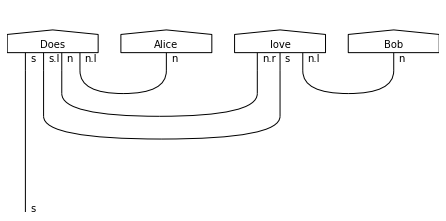

In [43]:
question = Does @ Alice @ love @ Bob \
           >> dp.Id(s @ s.l @ n) @ dp.Cup(n.l, n) @ dp.Id(n.r @ s) @ dp.Cup(n.l, n) \
           >> dp.Id(s @ s.l) @ dp.Cup(n, n.r) @ dp.Id(s) \
           >> dp.Id(s) @ dp.Cup(s.l, s)
dp.pregroup.draw(question)

In [44]:
F(question) == 1

True